# Calculo Coeficiente - Carlos Díaz

      X   Y   Z     XY    X^2
0   191   8  27   1528  36481
1   185   5  21    925  34225
2   200  12  24   2400  40000
3   173  20  26   3460  29929
4   171  49  33   8379  29241
5   160  27  31   4320  25600
6   188  34  20   6392  35344
7   186  91  19  16926  34596
8   174  62  26  10788  30276
9   163  27  27   4401  26569
10  186  39  29   7254  34596
11  211  89  29  18779  44521
12  201  77  27  15477  40401
13  242  24  24   5808  58564
14  184  83  13  15272  33856
15  211  11  11   2321  44521
16  217   9  29   1953  47089
17  223   1  21    223  49729
18  208   8  20   1664  43264
19  199  46  36   9154  39601
Correlation Matrix:
            X         Y         Z        XY       X^2
X    1.000000 -0.200578 -0.219141 -0.100852  0.997933
Y   -0.200578  1.000000  0.056685  0.992465 -0.211565
Z   -0.219141  0.056685  1.000000  0.058791 -0.206546
XY  -0.100852  0.992465  0.058791  1.000000 -0.112661
X^2  0.997933 -0.211565 -0.206546 -0.112661  1.000000


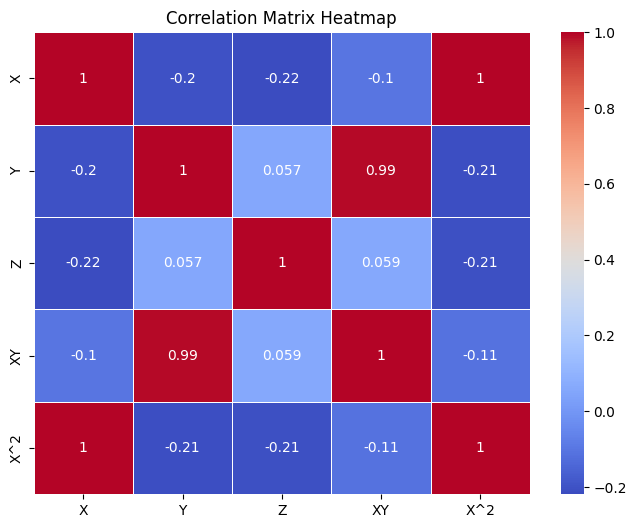

      X   Y   Z     XY    X^2 clasif_pts
0   191   8  27   1528  36481       Alto
1   185   5  21    925  34225       Alto
2   200  12  24   2400  40000       Alto
3   173  20  26   3460  29929      Medio
4   171  49  33   8379  29241      Medio
5   160  27  31   4320  25600      Medio
6   188  34  20   6392  35344       Alto
7   186  91  19  16926  34596       Alto
8   174  62  26  10788  30276      Medio
9   163  27  27   4401  26569      Medio
10  186  39  29   7254  34596       Alto
11  211  89  29  18779  44521       Alto
12  201  77  27  15477  40401       Alto
13  242  24  24   5808  58564       Alto
14  184  83  13  15272  33856       Alto
15  211  11  11   2321  44521       Alto
16  217   9  29   1953  47089       Alto
17  223   1  21    223  49729       Alto
18  208   8  20   1664  43264       Alto
19  199  46  36   9154  39601       Alto


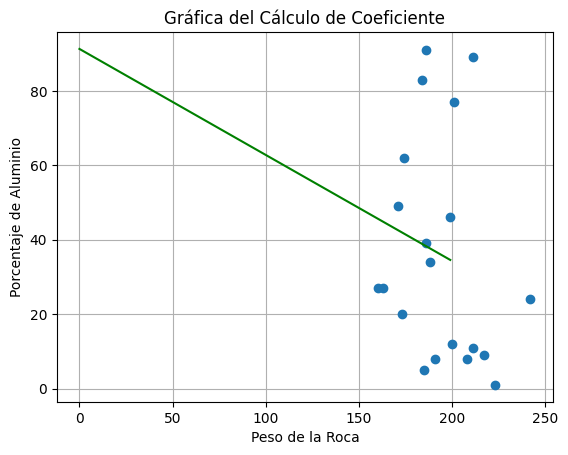

In [12]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Create a dataset of Chemical Elements of Rocks
peso_roca = [191,185,200,173,171,160,188,186,174,163,186,211,201,242,184,211,217,223,208,199] #peso (klg)
porcentaje_elemento = [8,5,12,20,49,27,34,91,62,27,39,89,77,24,83,11,9,1,8,46] # % de AU
isotopos = [27,21,24,26,33,31,20,19,26,27,29,29,27,24,13,11,29,21,20,36] # numero de isotopos de AU (sin unidad)
# Dictionary ({key:value})
# with the format {"str":list}
data_dict = {"X":peso_roca,
             "Y":porcentaje_elemento,
             "Z":isotopos}

# Turn a dictionary into a dataframe
df = pd.DataFrame(data_dict)

# Create XY & X^2 columns
df['XY'] = df['X'] * (df['Y'])
df['X^2'] = df['X'] ** 2

print(df)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#Hace la suma de las columnas del DataFrame
SumaColumnas = df.sum()

# Cuenta el numero de filas para el valor de n
n = int(len(df))

#Aplica los datos a la formula
m = (((n*SumaColumnas['XY'])-(SumaColumnas['X']*SumaColumnas['Y'])) / ((n*SumaColumnas['X^2'])-(SumaColumnas['X']**2)))
b = ((SumaColumnas['Y']/n)-(m*(SumaColumnas['X']/n)))
b=float(b)

#incluye variables discretas
df['clasif_pts'] = 'Bajo'
df.loc[df['X'] > 180, 'clasif_pts'] = 'Alto'
df.loc[(df['X'] > 80) & (df['X'] <= 180), 'clasif_pts'] = 'Medio'

print(df)

#Calcula el Punto Final
xfin = df['X'].tail(1).values[0]
yfin =m*(xfin)+b

# Crear un dataset
xfinal = [0,xfin]
yfinal = [b,yfin]

data_dic_grafica = {"xf":xfinal,
               "yf":yfinal}

# Convertir en un dataframe
dicgrafica = pd.DataFrame(data_dic_grafica)

#Grafica los datos
plt.plot(peso_roca,porcentaje_elemento, 'o', linewidth=0, label='Lineal')
plt.plot(xfinal, yfinal, color='green', label='Regresión Lineal')
plt.xlabel("Peso de la Roca")
plt.ylabel("Porcentaje de Aluminio")
plt.title("Gráfica del Cálculo de Coeficiente")
plt.grid()
plt.show()
plt.savefig("grafica_coeficiente.png")
plt.close()
